#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

#### Load the email dataset

In [2]:
data = pd.read_csv('F:\INTERNSHIPS\OASIS INFOBYTE\TASK 4\DATASET FOR (TASK 4)\spam.csv',encoding='latin1')
data=data[['v1','v2']]
data.columns=['label','text']

#### Reading the dataset

In [3]:
# first five rows of the dataset
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# last five rows of the dataset
data.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
# Number of rows and columns of the dataset
data.shape

(5572, 2)

In [6]:
# Column names of the dataset
data.columns

Index(['label', 'text'], dtype='object')

#### Information of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### Checking for null values

In [8]:
data.isnull().sum()

label    0
text     0
dtype: int64

- Our dataset do not contains null values.

#### Data Preprocessing

In [9]:
# Encode labels as 0 for 'ham' and 1 for 'spam'
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

#### Data Splitting

In [10]:
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("*"*60)
print(X.head())
print("*"*60)

************************************************************
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object
************************************************************


In [12]:
print("*"*30)
print(y.head())
print("*"*30)

******************************
0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64
******************************


In [13]:
print("X_train")
print("*"*10)
X_train.head()

X_train
**********


1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
Name: text, dtype: object

In [14]:
print("X_test")
print("*"*10)
X_test.head()

X_test
**********


3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
Name: text, dtype: object

In [15]:
print("y_train")
print("*"*10)
y_train.head()

y_train
**********


1978    0
3989    1
3935    0
4078    0
4086    1
Name: label, dtype: int64

In [16]:
print("y_test")
print("*"*10)
y_test.head()

y_test
**********


3245    0
944     0
1044    1
2484    0
812     1
Name: label, dtype: int64

#### Feature Extraction

In [17]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#### Model Selection and Training

In [18]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

#### Model Evaluation

In [19]:
y_pred = clf.predict(X_test_tfidf)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("_"*30)
print("Accuracy:", accuracy)
print("_"*30)

______________________________
Accuracy: 0.9721973094170404
______________________________


In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("_"*30)
print("Confusion Matrix : ")
print("_"*30)
print("\n",conf_matrix)
print("_"*30)

______________________________
Confusion Matrix : 
______________________________

 [[965   0]
 [ 31 119]]
______________________________


In [22]:
class_report = classification_report(y_test, y_pred)
print("_"*60)
print("Classification Report :")
print("_"*60)
print("\n", class_report)
print("_"*60)

____________________________________________________________
Classification Report :
____________________________________________________________

               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

____________________________________________________________


#### Visualization - Confusion Matrix

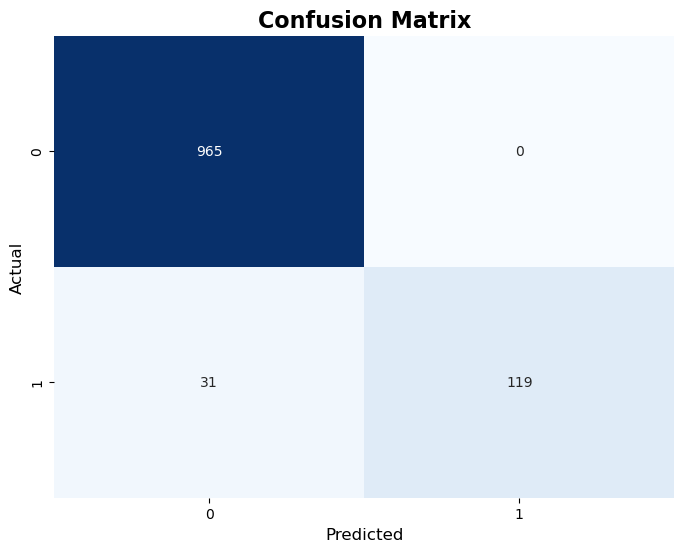

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted',size=12)
plt.ylabel('Actual',size=12)
plt.title('Confusion Matrix',size=16,fontweight="black")
plt.show()

#### Visualization - Class Distribution

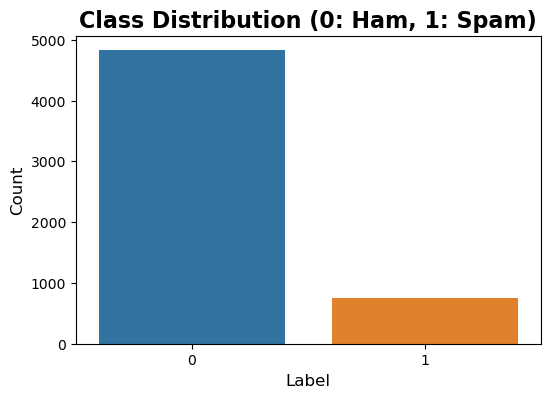

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data)
plt.xlabel('Label', size=12)
plt.ylabel('Count', size=12)
plt.title('Class Distribution (0: Ham, 1: Spam)', size=16, fontweight="bold")
plt.show()

#### Visualization - ROC Curve

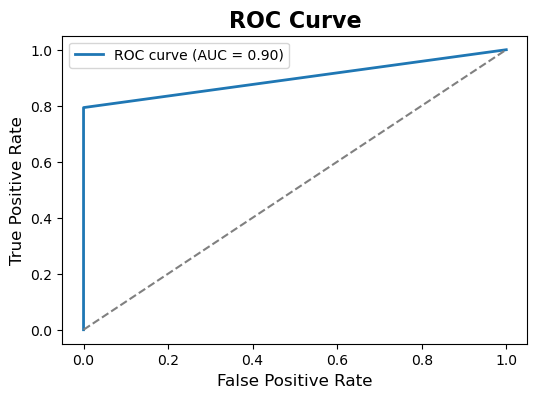

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate', size=12)
plt.title('ROC Curve', size=16, fontweight="bold")
plt.legend()
plt.show()

#### Visualization - Precision-Recall Curve

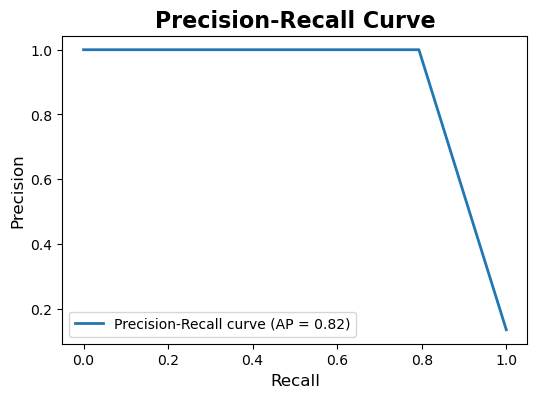

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

# Create and plot the Precision-Recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(avg_precision))
plt.xlabel('Recall',size=12)
plt.ylabel('Precision',size=12)
plt.title('Precision-Recall Curve', size=16, fontweight="bold")
plt.legend()
plt.show()